# Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
claimants = pd.read_csv("/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [4]:
claimants.shape

(1340, 6)

In [5]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

Visualization-

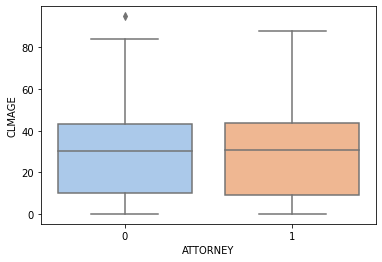

In [7]:
sns.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="pastel");

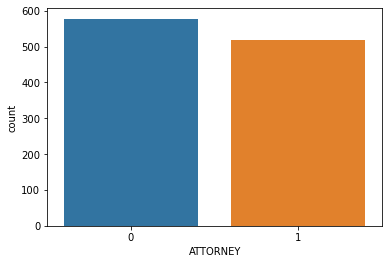

In [8]:
#check for class imbalance
sns.countplot(x="ATTORNEY",data=claimants);

In [9]:
#crosstab
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,69,509
1,36,482


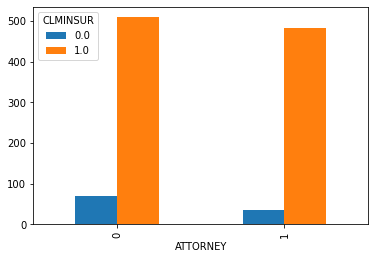

In [10]:
#visualizing the above
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar");

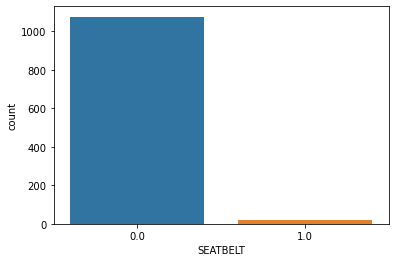

In [11]:
#check for class imbalance
sns.countplot(x="SEATBELT",data=claimants);

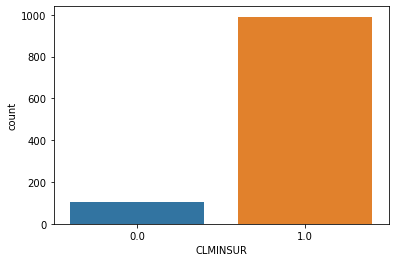

In [12]:
#check for class imbalance
sns.countplot(x="CLMINSUR",data=claimants);

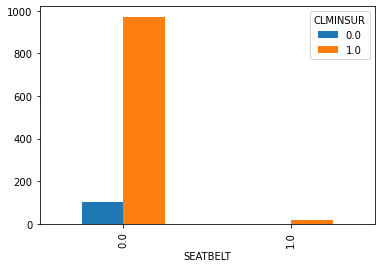

In [13]:
#visualizing the above
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar");

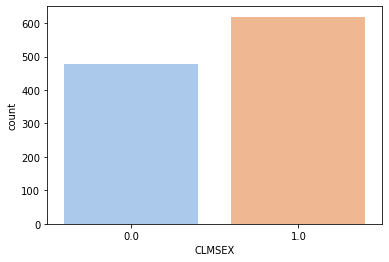

In [14]:
#check for class imbalance
sns.countplot(x="CLMSEX",data=claimants,palette="pastel");

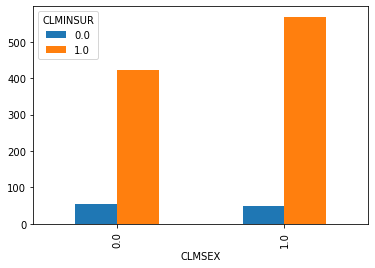

In [15]:
#visualizing the above
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar");

In [16]:
claimants.tail()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177
1339,1,1.0,1.0,0.0,30.0,0.688


In [17]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [18]:
#creating instance of Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [19]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted_prob': y_pred})
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [21]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [22]:
#Accuracy of model
((381+395)/(381+197+123+395))*100

70.8029197080292

In [23]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



### ROC Curve

In [24]:
classifier.predict_proba (X) [:,1]

array([3.04621690e-06, 5.07148875e-01, 5.75166843e-01, ...,
       7.39028665e-01, 2.85940593e-01, 6.80431213e-01])

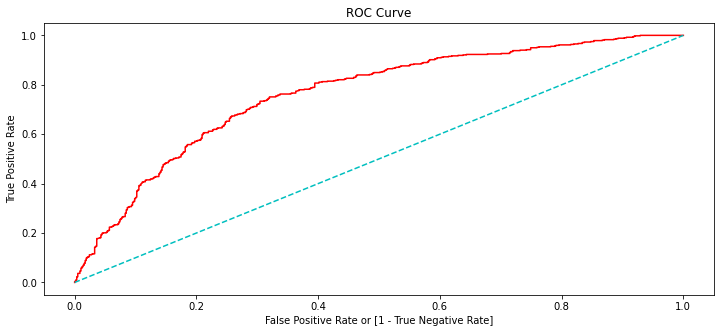

In [25]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])  #x,y axis

auc = roc_auc_score(Y, y_pred)

fig=plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='r', label='logit model ( area  = %f)'%auc)  # %0.2f is old python precison for no. of decimals
plt.plot([0, 1], [0, 1], 'c--')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate');

In [26]:
auc*100

71.08589063606365